### 0. Original data(price=price, volume=volume)
- 0.0. window size = 10
- 0.1. window size = 30
- 0.2. window size = 5
=
### 1. pct_change
- 0.0. window size = 10
- 0.1. window size = 30
- 0.2. window size = 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import FinanceDataReader as fdr

In [2]:
df=pd.read_csv('carbon.csv', index_col='Date')
df.head(2)

,euro,bcoin,euro_stox,german,uk,french,chino,india,brasil,corea,...,v_corea,v_states,v_copper,v_lumber,v_cattle,v_v_corn,v_wheat,v_crude,v_n_gas,v_carbon
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1.1934,274.8,3023.14,9473.16,6417.16,4111.36,3350.52,8378.40,47517.0,1915.75,...,313440000.0,116160000.0,330.0,190.0,16540.0,140390.0,45080.0,0.0,141780.0,90.0
2015-01-06,1.1889,282.3,3007.91,9469.66,6366.51,4083.50,3351.45,8127.35,48001.0,1882.45,...,303690000.0,101870000.0,310.0,200.0,31200.0,138310.0,52460.0,0.0,111340.0,590.0


In [ ]:
### 0. Original data(price=price, volume=volume)

### 0.1 window size =10

In [3]:
window_size =10
x = []
y = []

for i in range(len(df) - window_size):
    x.append([df.iloc[i+j,:] for j in range(window_size)])
    y.append(df.iloc[window_size+i, 18])

In [4]:
X = np.asarray(x)
y = np.asarray(y)
print(X.shape, y.shape)

(1815, 10, 38) (1815,)


In [5]:
tts = int(X.shape[0]*0.8)

x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1452, 10, 38) (363, 10, 38) (1452,) (363,)


In [6]:
X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

(1452, 380) (363, 380)


In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

In [8]:
mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['linear', 'ridge','lasso','xgb','lgbm','rfr']

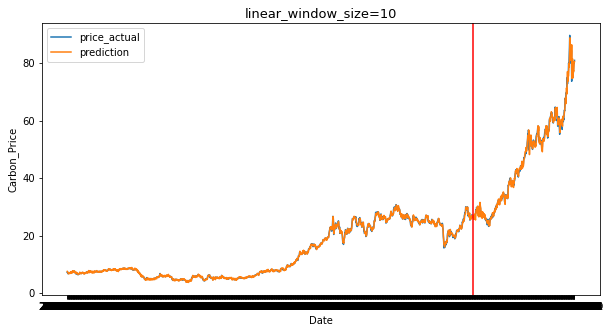

---------------------
model: linear
train_r2score: 1.0
test_r2score: 0.99
train_mse: 0.14
test_mse: 2.34


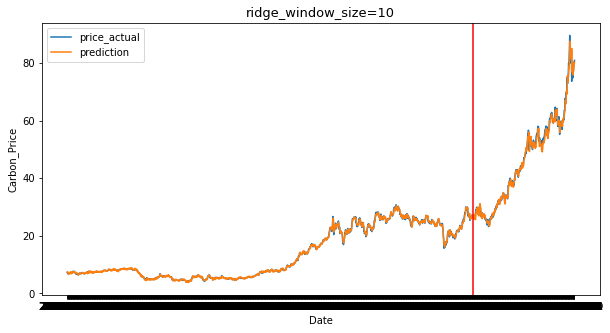

---------------------
model: ridge
train_r2score: 1.0
test_r2score: 0.99
train_mse: 0.15
test_mse: 2.26


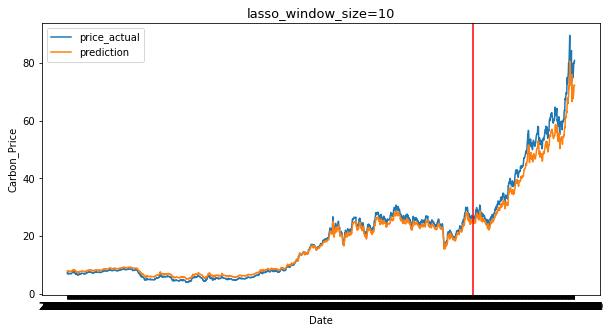

---------------------
model: lasso
train_r2score: 0.98
test_r2score: 0.92
train_mse: 1.21
test_mse: 21.17


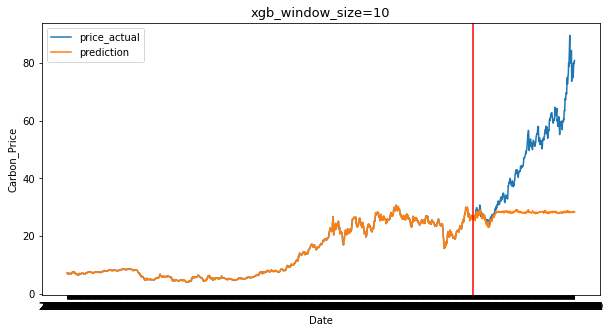

---------------------
model: xgb
train_r2score: 1.0
test_r2score: -1.29
train_mse: 0.0
test_mse: 575.29


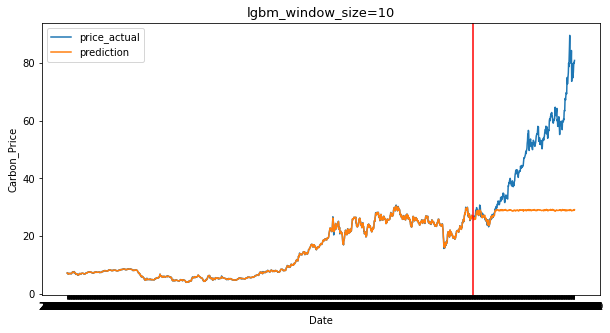

---------------------
model: lgbm
train_r2score: 1.0
test_r2score: -1.19
train_mse: 0.01
test_mse: 550.83


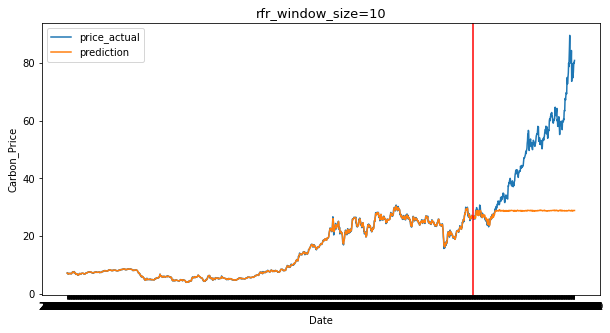

---------------------
model: rfr
train_r2score: 1.0
test_r2score: -1.21
train_mse: 0.03
test_mse: 555.9


In [12]:

for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df.iloc[10:].index

    plt.figure(figsize=(10,5))
    plt.plot(df['carbon'].iloc[10:], label ='price_actual')
    plt.plot(x, label ='prediction')
    plt.axvline(df.index[x_train.shape[0]+10], color='red', ls ='-')
    plt.title('{}_window_size=10'.format(n_mds[i]), fontsize =13)
    plt.xlabel('Date')
    plt.ylabel('Carbon_Price')
    plt.legend()
    plt.show()


    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', np.round(r2_score(y_train, trpreds),2))
    print('test_r2score:', np.round(r2_score(y_test, preds),2))
    print('train_mse:', np.round(mean_squared_error(y_train, trpreds),2))
    print('test_mse:', np.round(mean_squared_error(y_test, preds),2))
    


- 선형, 라쏘, 릿지에서는 비슷한 수준의 학습
- 부스팅 계열에서는 학습은 잘되나 예측이 안됨

### 0.1. window size = 30

In [15]:
window_size =30
x = []
y = []

for i in range(len(df) - window_size):
    x.append([df.iloc[i+j,:] for j in range(window_size)])
    y.append(df.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1436, 1140) (359, 1140)


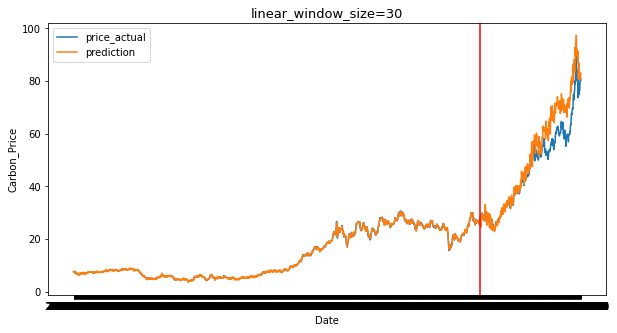

---------------------
model: linear
train_r2score: 1.0
test_r2score: 0.83
train_mse: 0.04
test_mse: 42.51


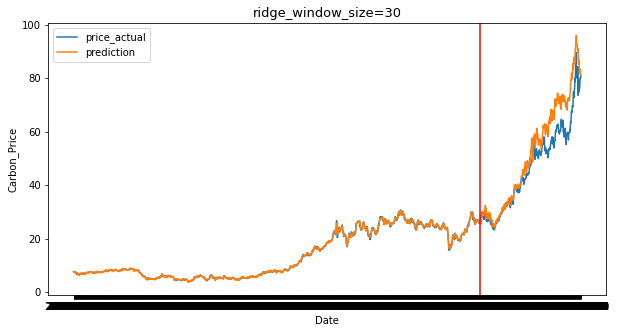

---------------------
model: ridge
train_r2score: 1.0
test_r2score: 0.81
train_mse: 0.06
test_mse: 47.7


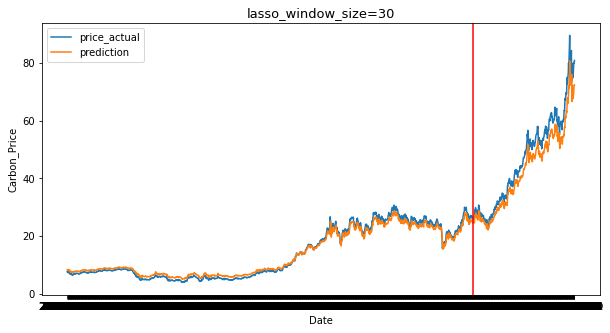

---------------------
model: lasso
train_r2score: 0.98
test_r2score: 0.92
train_mse: 1.21
test_mse: 21.1


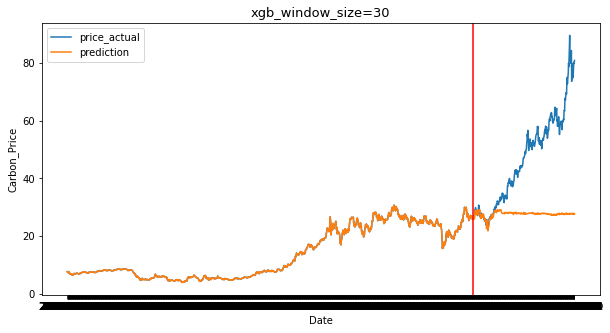

---------------------
model: xgb
train_r2score: 1.0
test_r2score: -1.41
train_mse: 0.0
test_mse: 602.32


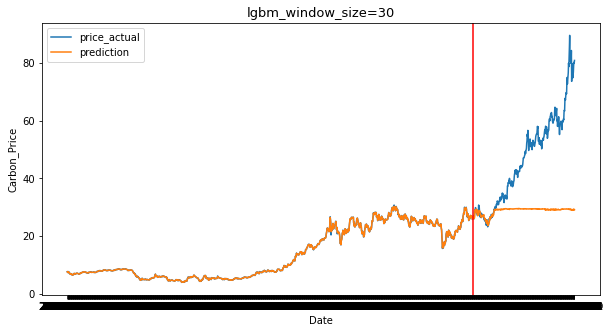

---------------------
model: lgbm
train_r2score: 1.0
test_r2score: -1.18
train_mse: 0.0
test_mse: 544.94


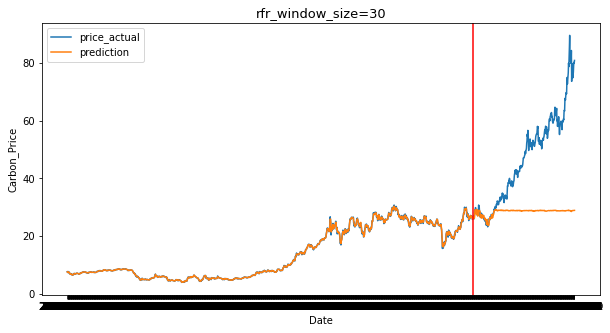

---------------------
model: rfr
train_r2score: 1.0
test_r2score: -1.25
train_mse: 0.03
test_mse: 562.18


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['linear', 'ridge','lasso','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df.iloc[30:].index

    plt.figure(figsize=(10,5))
    plt.plot(df['carbon'].iloc[30:],  label ='price_actual')
    plt.plot(x,label ='prediction')
    plt.axvline(df.index[x_train.shape[0]+30], color='red', ls ='-')
    plt.title('{}_window_size=30'.format(n_mds[i]), fontsize =13)
    plt.xlabel('Date')
    plt.ylabel('Carbon_Price')
    plt.legend()
    plt.show()
    
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', np.round(r2_score(y_train, trpreds),2))
    print('test_r2score:', np.round(r2_score(y_test, preds),2))
    print('train_mse:', np.round(mean_squared_error(y_train, trpreds),2))
    print('test_mse:', np.round(mean_squared_error(y_test, preds),2))


  

- window_size=10 보다 성능 낮음, 학습도 덜됨

### 2. window size =5

In [13]:
window_size =5
x = []
y = []

for i in range(len(df) - window_size):
    x.append([df.iloc[i+j,:] for j in range(window_size)])
    y.append(df.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape, tts)

(1456, 190) (364, 190) 1456


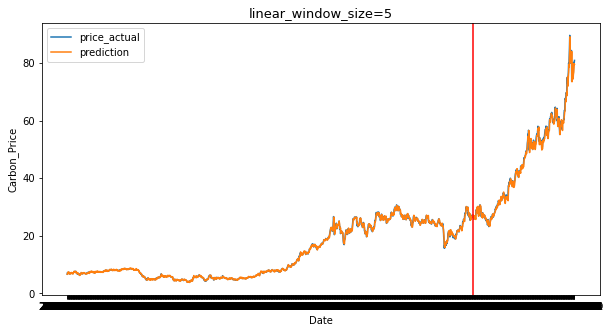

---------------------
model: linear
train_r2score: 1.0
test_r2score: 0.99
train_mse: 0.17
test_mse: 2.27


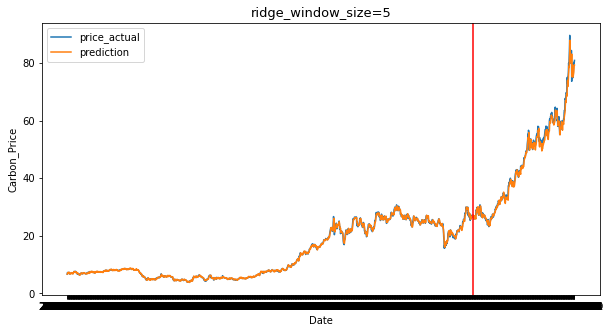

---------------------
model: ridge
train_r2score: 1.0
test_r2score: 0.99
train_mse: 0.18
test_mse: 2.4


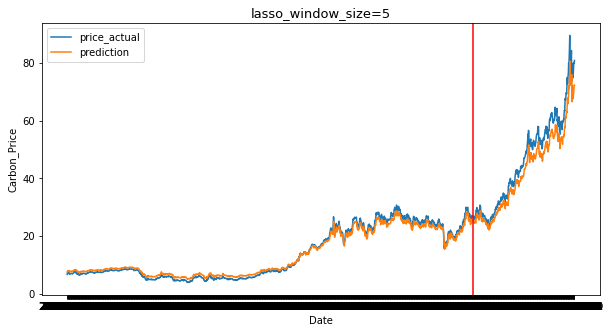

---------------------
model: lasso
train_r2score: 0.98
test_r2score: 0.92
train_mse: 1.21
test_mse: 21.17


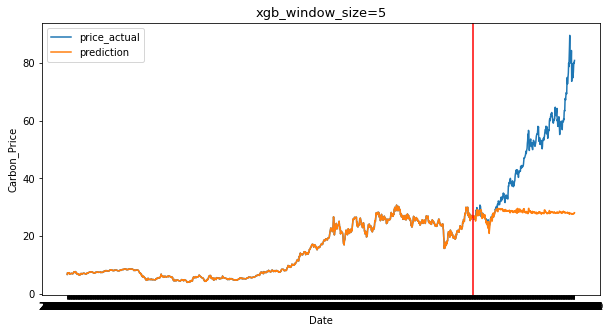

---------------------
model: xgb
train_r2score: 1.0
test_r2score: -1.29
train_mse: 0.0
test_mse: 577.15


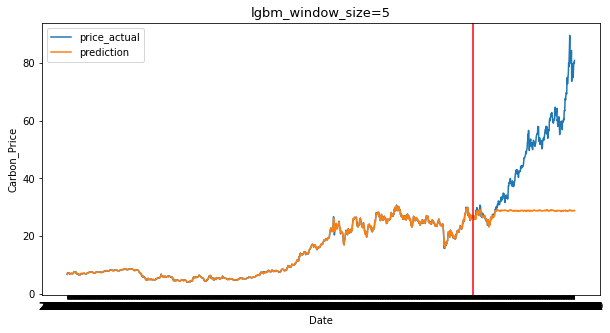

---------------------
model: lgbm
train_r2score: 1.0
test_r2score: -1.2
train_mse: 0.01
test_mse: 554.3


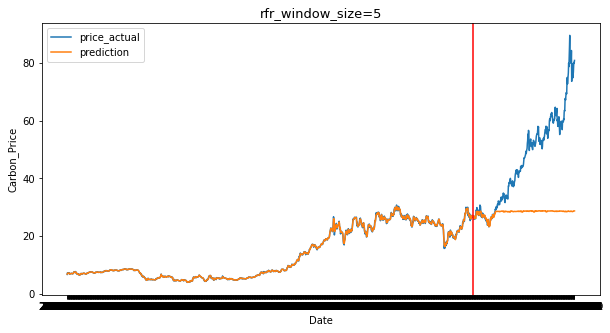

---------------------
model: rfr
train_r2score: 1.0
test_r2score: -1.23
train_mse: 0.03
test_mse: 561.83


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['linear', 'ridge','lasso','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df.iloc[5:].index

    plt.figure(figsize=(10,5))
    plt.plot(df['carbon'].iloc[5:], label ='price_actual')
    plt.plot(x,label ='prediction')
    plt.axvline(df.index[x_train.shape[0]+5], color='red', ls ='-')
    
    plt.title('{}_window_size=5'.format(n_mds[i]), fontsize =13)
    plt.xlabel('Date')
    plt.ylabel('Carbon_Price')
    plt.legend()
    plt.show()
    
    
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', np.round(r2_score(y_train, trpreds),2))
    print('test_r2score:', np.round(r2_score(y_test, preds),2))
    print('train_mse:', np.round(mean_squared_error(y_train, trpreds),2))
    print('test_mse:', np.round(mean_squared_error(y_test, preds),2))

    

- window_size=10 과 비슷한 수준

## window_size=5,10 일 때 일반 선형, 릿지 모델의 예측력이 0.99로 상당히 높게 나타남

### 1. pct_change
- 0.0. window size = 10
- 0.1. window size = 30
- 0.2. window size = 5

In [ ]:
# 00 EDA

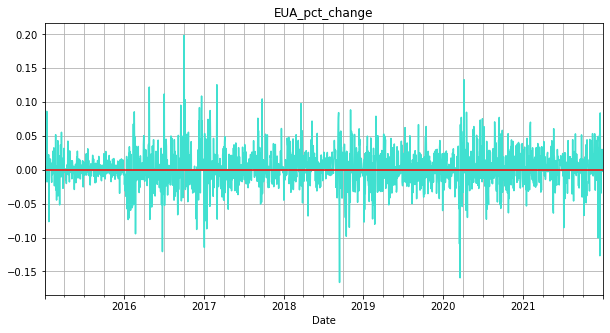

In [261]:
plt.figure(figsize=(10,5))
df['carbon'].pct_change().plot(color = 'turquoise')
plt.title('EUA_pct_change')
plt.grid(which='both')
plt.axhline(0, color='red')

plt.show()

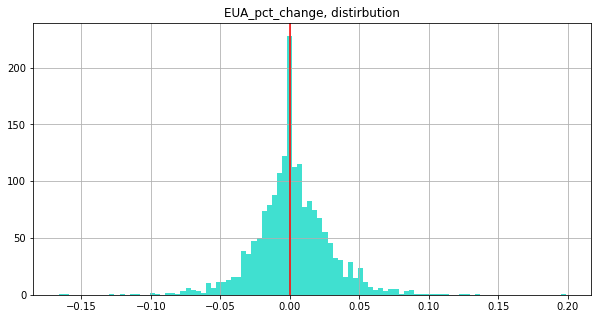

In [260]:
plt.figure(figsize=(10,5))
plt.hist(df['carbon'].pct_change(), bins=100, color = 'turquoise')
plt.title('EUA_pct_change, distirbution')
plt.grid(which='both')
plt.axvline(0, color='red')

plt.show()

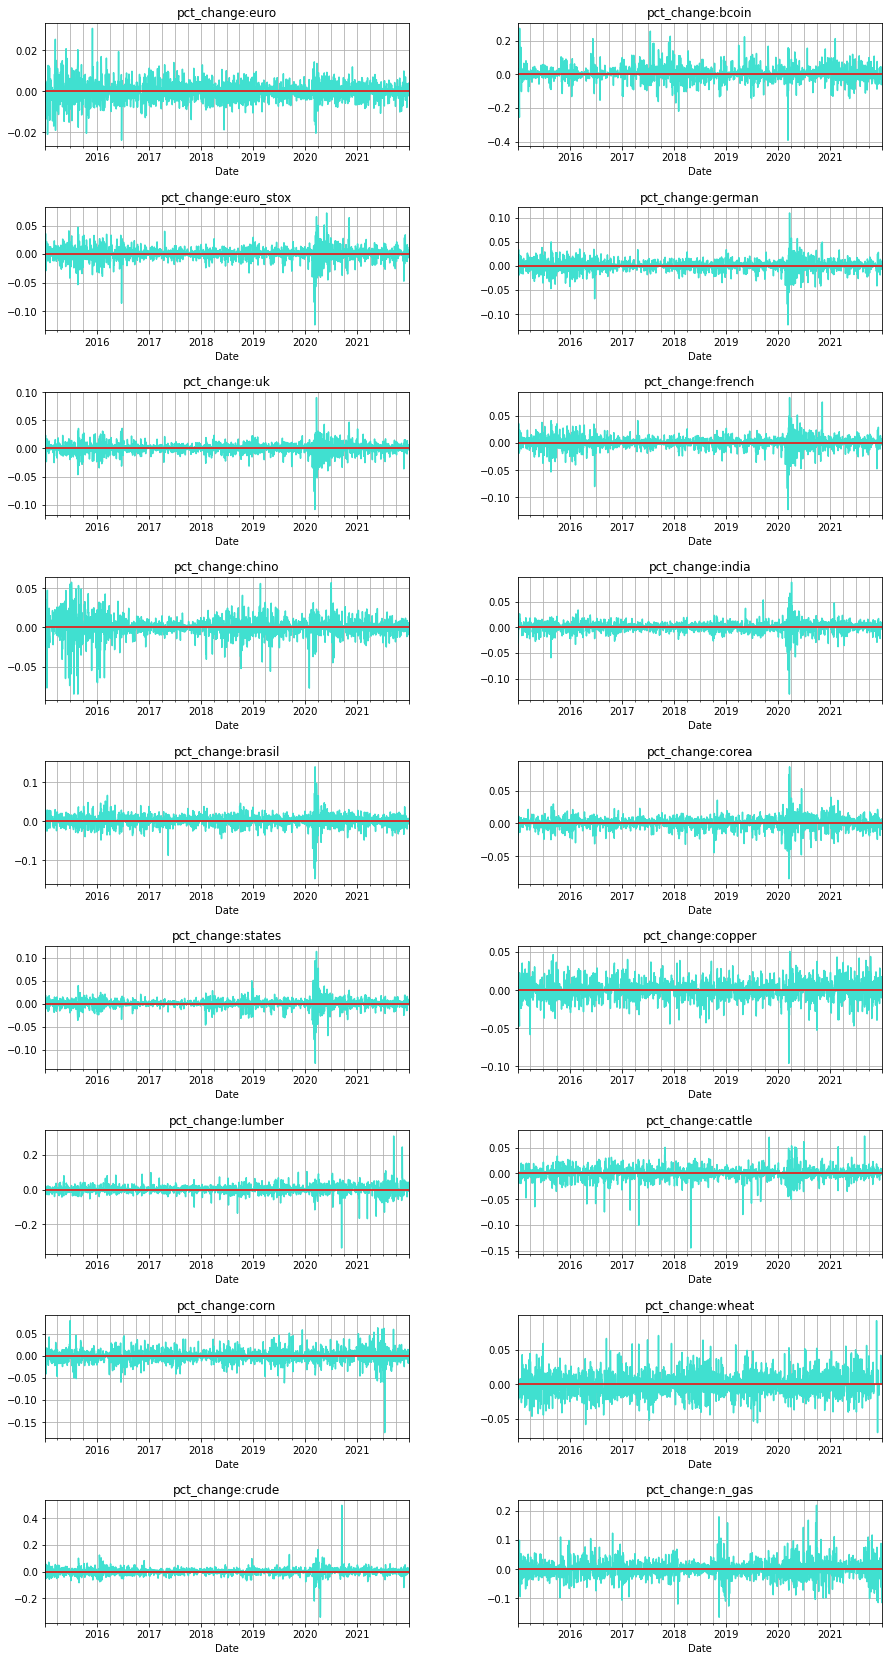

In [262]:
plt.figure(figsize =(15, 60))

for i in range(len(ftrs_sc)):
    plt.subplot(18, 2, i+1)
    price.iloc[:, i].pct_change().plot(color = 'turquoise')
    plt.title('pct_change:{}'.format(price.columns[i]))
    plt.grid(which='both')
    plt.axhline(0, color='red')

plt.subplots_adjust(wspace=0.3, hspace= 0.5)

plt.show()

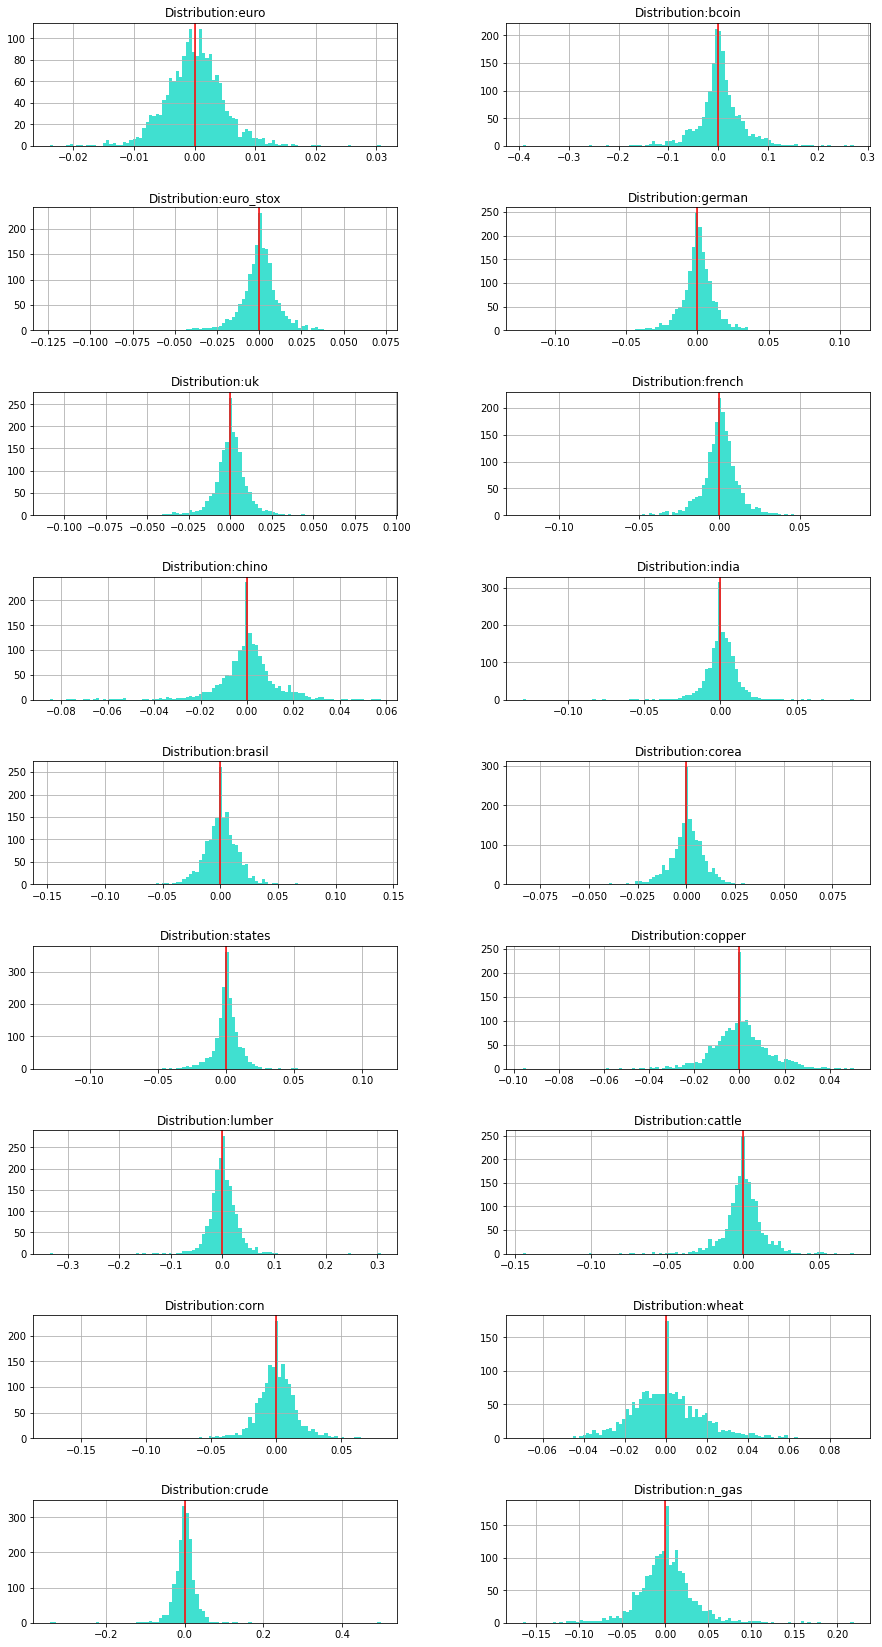

In [259]:
plt.figure(figsize =(15, 60))

for i in range(len(ftrs_sc)):
    plt.subplot(18, 2, i+1)
    plt.hist(price.iloc[:, i].pct_change(), bins=100, color = 'turquoise')
    plt.title('Distribution:{}'.format(price.columns[i]))
    plt.grid(which='both')
    plt.axvline(0, color='red')

    
plt.subplots_adjust(wspace=0.3, hspace= 0.5)

plt.show()

### 1. window_size =10

In [17]:
df_change = df.pct_change()[1:].fillna(0)

In [18]:
df_change.shape

(1824, 38)

In [19]:
window_size =10
x = []
y = []

for i in range(len(df_change) - window_size):
    x.append([df_change.iloc[i+j,:] for j in range(window_size)])
    y.append(df_change.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1451, 380) (363, 380)


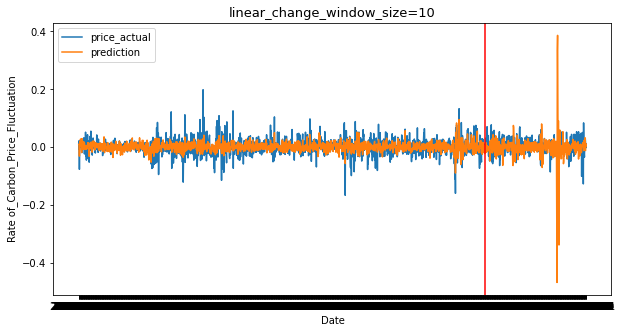

---------------------
model: linear
train_r2score: 0.27
test_r2score: -3.23
train_mse: 0.0
test_mse: 0.0


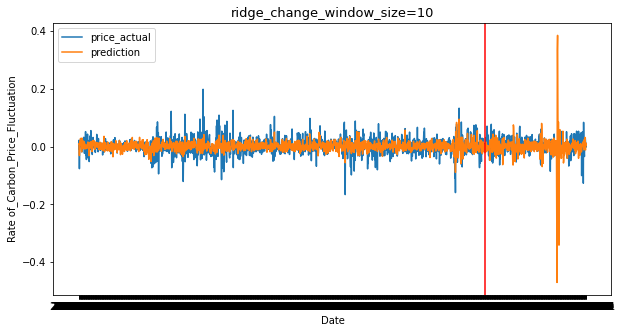

---------------------
model: ridge
train_r2score: 0.27
test_r2score: -3.23
train_mse: 0.0
test_mse: 0.0


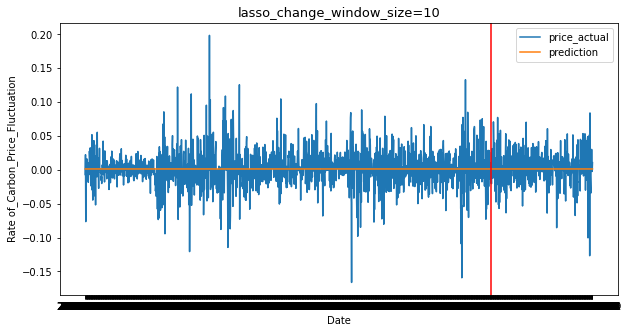

---------------------
model: lasso
train_r2score: 0.0
test_r2score: -0.01
train_mse: 0.0
test_mse: 0.0


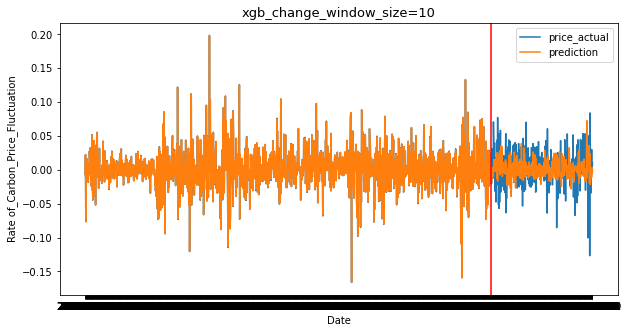

---------------------
model: xgb
train_r2score: 1.0
test_r2score: -0.26
train_mse: 0.0
test_mse: 0.0


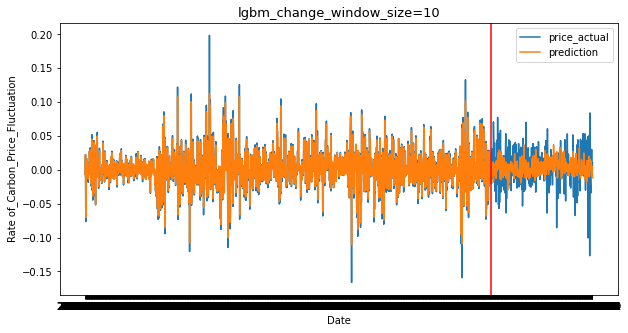

---------------------
model: lgbm
train_r2score: 0.98
test_r2score: -0.26
train_mse: 0.0
test_mse: 0.0


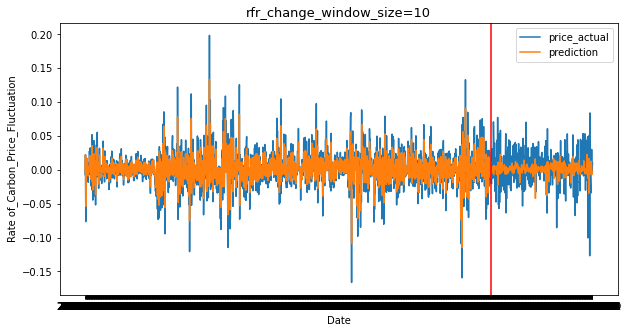

---------------------
model: rfr
train_r2score: 0.86
test_r2score: -0.08
train_mse: 0.0
test_mse: 0.0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['linear', 'ridge','lasso','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df_change.iloc[10:].index

    plt.figure(figsize=(10,5))
    plt.plot(df_change['carbon'].iloc[10:], label ='price_actual')
    plt.plot(x,label ='prediction')
    plt.axvline(df.index[x_train.shape[0]+10], color='red', ls ='-')

    
    plt.title('{}_change_window_size=10'.format(n_mds[i]), fontsize =13)
    plt.xlabel('Date')
    plt.ylabel('Rate of_Carbon_Price_Fluctuation')
    plt.legend()
    plt.show()
    
    
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', np.round(r2_score(y_train, trpreds),2))
    print('test_r2score:', np.round(r2_score(y_test, preds),2))
    print('train_mse:', np.round(mean_squared_error(y_train, trpreds),2))
    print('test_mse:', np.round(mean_squared_error(y_test, preds),2))

    

- 트레인이 잘되는 모델도 있으나 예측력은 다 상당히 낮음

### 2. window size =30

In [23]:
window_size =30
x = []
y = []

for i in range(len(df_change) - window_size):
    x.append([df_change.iloc[i+j,:] for j in range(window_size)])
    y.append(df_change.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1435, 1140) (359, 1140)


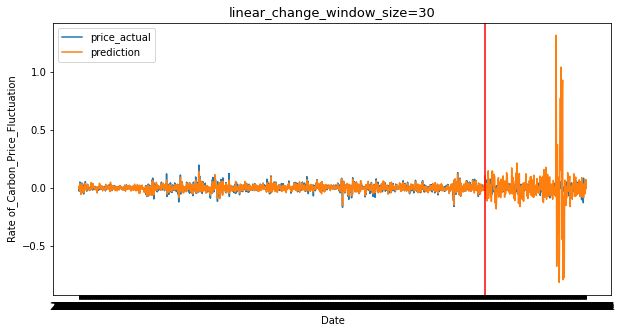

---------------------
model: linear
train_r2score: 0.78
test_r2score: -44.11
train_mse: 0.0
test_mse: 0.03


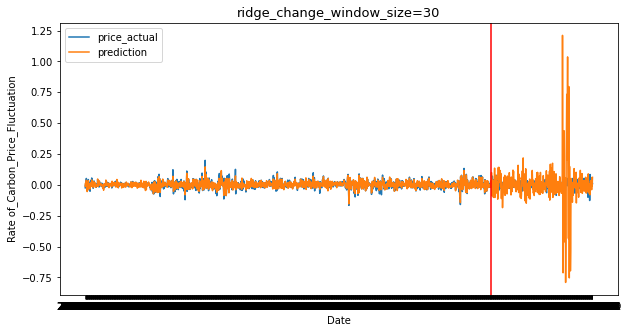

---------------------
model: ridge
train_r2score: 0.79
test_r2score: -39.87
train_mse: 0.0
test_mse: 0.03


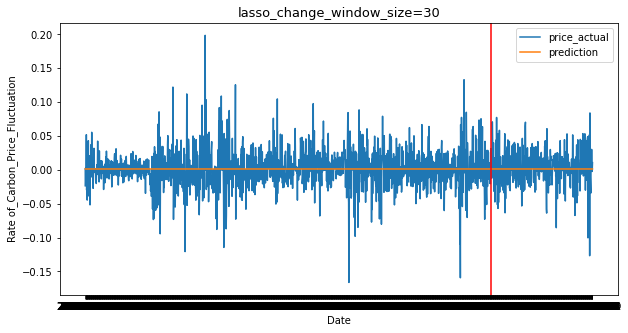

---------------------
model: lasso
train_r2score: 0.0
test_r2score: -0.01
train_mse: 0.0
test_mse: 0.0


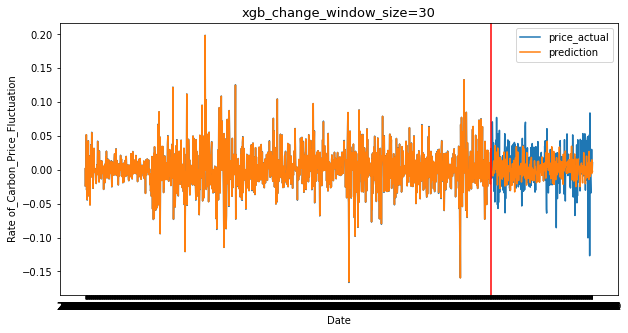

---------------------
model: xgb
train_r2score: 1.0
test_r2score: -0.23
train_mse: 0.0
test_mse: 0.0


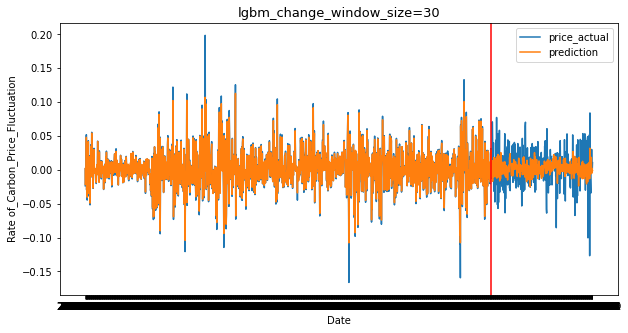

---------------------
model: lgbm
train_r2score: 0.98
test_r2score: -0.14
train_mse: 0.0
test_mse: 0.0


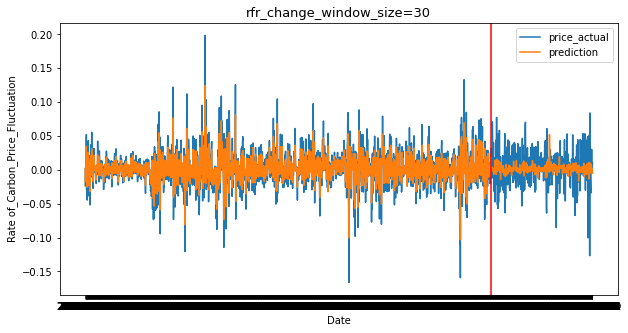

---------------------
model: rfr
train_r2score: 0.85
test_r2score: -0.04
train_mse: 0.0
test_mse: 0.0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['linear', 'ridge','lasso','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df_change.iloc[30:].index

    plt.figure(figsize=(10,5))
    plt.plot(df_change['carbon'].iloc[30:], label ='price_actual')
    plt.plot(x,label ='prediction')
    plt.axvline(df.index[x_train.shape[0]+30], color='red', ls ='-')
    
    plt.title('{}_change_window_size=30'.format(n_mds[i]), fontsize =13)
    plt.xlabel('Date')
    plt.ylabel('Rate of_Carbon_Price_Fluctuation')
    plt.legend()
    plt.show()
    
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', np.round(r2_score(y_train, trpreds),2))
    print('test_r2score:', np.round(r2_score(y_test, preds),2))
    print('train_mse:', np.round(mean_squared_error(y_train, trpreds),2))
    print('test_mse:', np.round(mean_squared_error(y_test, preds),2))

- price/ deep과 마찬가지로 30일 모델은 최근 상승분을 과다하게 모사하는 경향이 약간 있어보임
- 일부 트레인이 잘되는 모델이 있으나 예측력은 모두 저조함

### 3. window size = 5

In [21]:
window_size =5
x = []
y = []

for i in range(len(df_change) - window_size):
    x.append([df_change.iloc[i+j,:] for j in range(window_size)])
    y.append(df_change.iloc[window_size+i, 18])
    
X = np.asarray(x)
y = np.asarray(y)

tts = int(X.shape[0]*0.8)


x_train = X[:tts]
x_test = X[tts:]

y_train =y[:tts]
y_test = y[tts:]

X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(1455, 190) (364, 190)


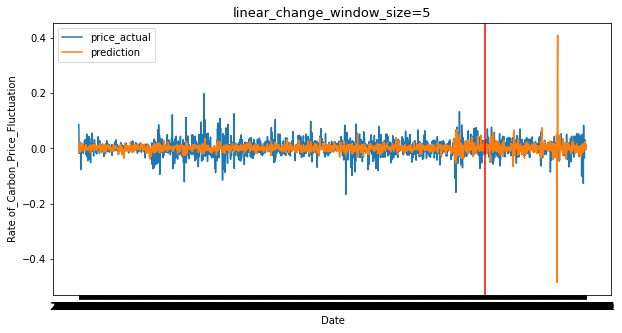

---------------------
model: linear
train_r2score: 0.15
test_r2score: -2.38
train_mse: 0.0
test_mse: 0.0


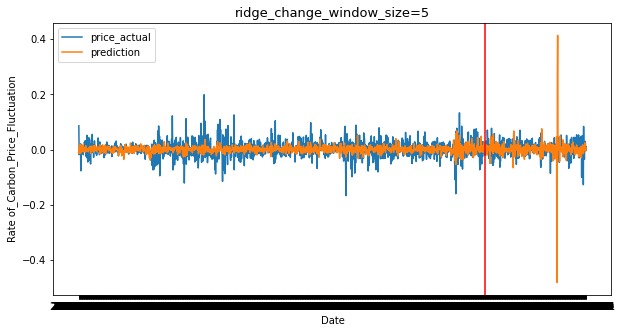

---------------------
model: ridge
train_r2score: 0.15
test_r2score: -2.34
train_mse: 0.0
test_mse: 0.0


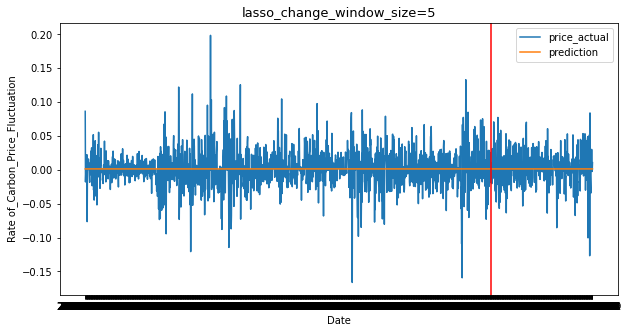

---------------------
model: lasso
train_r2score: 0.0
test_r2score: -0.01
train_mse: 0.0
test_mse: 0.0


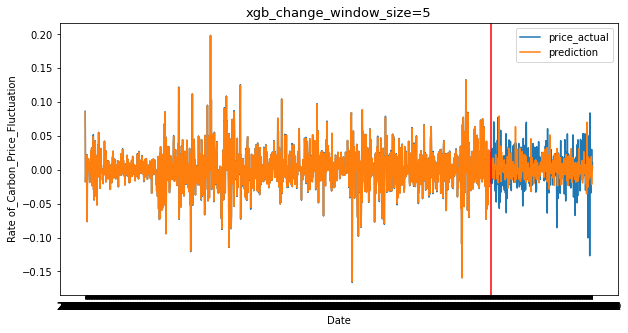

---------------------
model: xgb
train_r2score: 1.0
test_r2score: -0.36
train_mse: 0.0
test_mse: 0.0


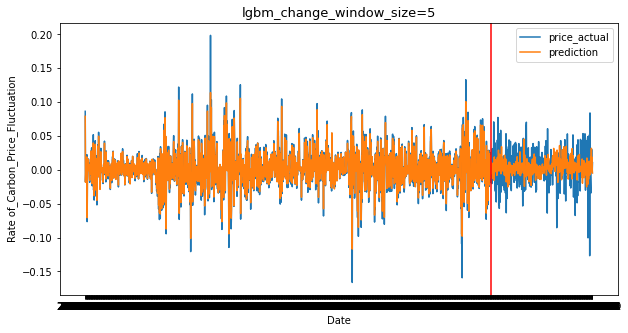

---------------------
model: lgbm
train_r2score: 0.97
test_r2score: -0.24
train_mse: 0.0
test_mse: 0.0


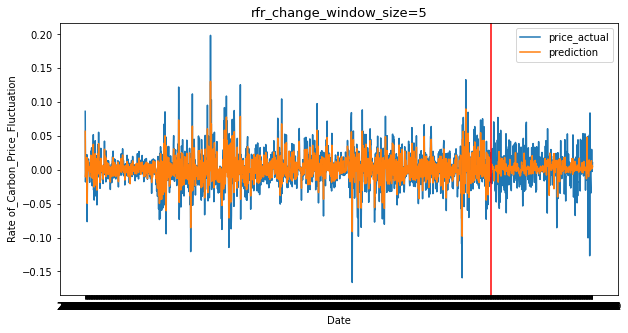

---------------------
model: rfr
train_r2score: 0.86
test_r2score: -0.13
train_mse: 0.0
test_mse: 0.0


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()


mds = [lr, rid,las,xgb,lgbm,rfr]
n_mds = ['linear', 'ridge','lasso','xgb','lgbm','rfr']


for i, m in enumerate(mds):
    m.fit(x_train_scaled, y_train)
    trpreds = m.predict(x_train_scaled)
    preds = m.predict(x_test_scaled)
    
    x = np.concatenate((trpreds, preds))
    x = pd.DataFrame(x)
    x.index = df_change.iloc[5:].index

    plt.figure(figsize=(10,5))
    plt.plot(df_change['carbon'].iloc[5:], label ='price_actual')
    plt.plot(x, label = 'prediction')
    plt.axvline(df.index[x_train.shape[0]+5], color ='red', ls ='-')
   
    plt.title('{}_change_window_size=5'.format(n_mds[i]), fontsize =13)
    plt.xlabel('Date')
    plt.ylabel('Rate of_Carbon_Price_Fluctuation')
    plt.legend()
    plt.show()
    
    
    print('---------------------')
    print('model:', n_mds[i])
    print('train_r2score:', np.round(r2_score(y_train, trpreds),2))
    print('test_r2score:', np.round(r2_score(y_test, preds),2))
    print('train_mse:', np.round(mean_squared_error(y_train, trpreds),2))
    print('test_mse:', np.round(mean_squared_error(y_test, preds),2))

- pct_change 모델은 전반적으로 예측력이 낮음
- 일부 학습이 잘되는 부스팅 모델이 있기도 하지만 예측력상승으로 이어지지 않음

### 2-1-3-1 grid search 
### data form = pct_change 3. window size = 5

In [ ]:
# xgb grid

In [295]:
from random import randint
params= {
    'n_estimators':[200, 300,400],
    'max_depth':[10, 15,20,25],
    'min_samples_split':[0.05, 0.01, 0.005],
}

In [296]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(xgb, params, n_jobs=-1)
gs.fit(x_train_scaled, y_train)

[17:27:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
 

In [ ]:
1721
1729

In [297]:
gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, min_samples_split=0.05, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [299]:
ddaq =gs.best_estimator_
print('train정확도', ddaq.score(x_train_scaled, y_train))
print('test정확도', ddaq.score(x_test_scaled, y_test))

train정확도 0.9998190227812636
test정확도 -0.47446222799467197


In [301]:
# rfr grid
from random import randint
params= {
    'n_estimators':[200, 300,400],
    'max_depth':[10, 15,20,25],
    'min_samples_split':[0.05, 0.01, 0.005],
}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(rfr, params, n_jobs=-1)
gs.fit(x_train_scaled, y_train)

gs.best_estimator_

ddaq =gs.best_estimator_
print('train정확도', ddaq.score(x_train_scaled, y_train))
print('test정확도', ddaq.score(x_test_scaled, y_test))

train정확도 0.2455160172622428
test정확도 -0.11107231188906641


In [302]:
gs.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_split=0.05, n_estimators=200)

In [303]:
gs.best_score_

-0.011490840834022142